In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

from generate import *

In [2]:
model = torch.load('all.pt').cuda()

/home/tycho/anaconda3/lib/python3.6/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'model.CharRNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [3]:
def wrap_rnn_output(text, hiddens, W=20):
    ''' Wrap text with hidden units to certain width '''
    new_text, new_hiddens = [], []
    for char, hidden in zip(text, hiddens):
        new_text.append(char)
        new_hiddens.append(hidden)
        if char == '\n':
            for i in range(W - len(new_text) % W):
                new_text.append(' ')
                new_hiddens.append(np.zeros((2, 1, 100)))
    for i in range(W - len(new_text) % W):
        new_text.append(' ')
        new_hiddens.append(np.zeros((2, 1, 100)))
    
    return np.array(new_text), np.array(new_hiddens)

In [4]:
def plot_rnn_output(text, hiddens, W, N=None, zoom=1.0):
    ''' Plot wrapped rnn output with each color representing the activation 
        of a certain node in the hidden representation '''
    if not N:
        N = hiddens.shape[0]

    plt.figure(figsize=(zoom*W/5, zoom*len(text)/W*N/3))
    for i in range(N):
        plt.subplot(N, 1, i+1)
        print(hiddens.shape)
        heat = hiddens[:, 1, 0, i]
        sns.heatmap(heat.reshape(-1, W), annot=text.reshape(-1, W), fmt='s',
                    cbar=False, cmap='coolwarm')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [5]:
text, hiddens = generate(model, '\n', 500, 0.8, True)

(1140, 2, 1, 100)
(1140, 2, 1, 100)


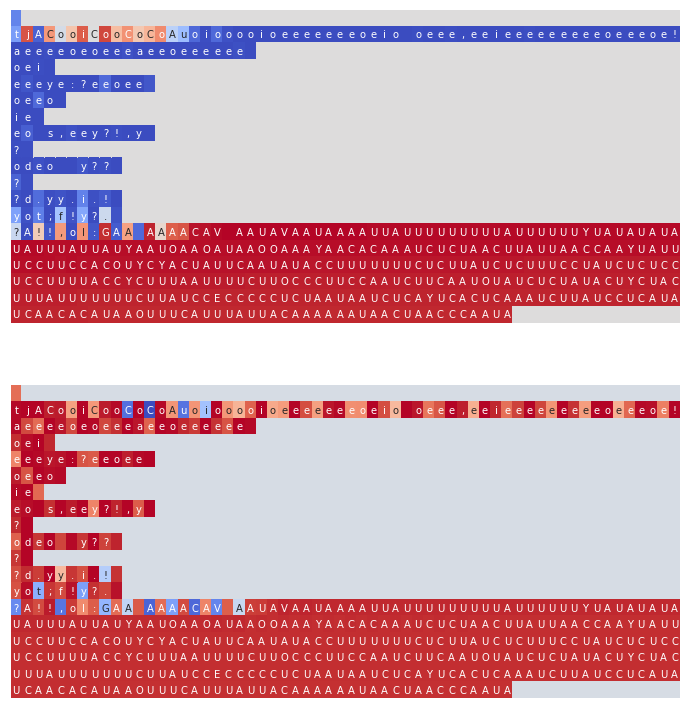

In [6]:
W = 60
wrapped_text, wrapped_hiddens = wrap_rnn_output(text, hiddens, W=W)
plot_rnn_output(wrapped_text, wrapped_hiddens, W=W, N=2, zoom=1.0)